### Import and extract data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# read dataset
df_10 = pd.read_csv("./mort/ACSDT1Y2010.B25087_data_with_overlays_2021-11-30T202546.csv")
df_11 = pd.read_csv("./mort/ACSDT1Y2011.B25087_data_with_overlays_2021-11-30T202546.csv")
df_12 = pd.read_csv("./mort/ACSDT1Y2012.B25087_data_with_overlays_2021-11-30T202546.csv")
df_13 = pd.read_csv("./mort/ACSDT1Y2013.B25087_data_with_overlays_2021-11-30T202546.csv")
df_14 = pd.read_csv("./mort/ACSDT1Y2014.B25087_data_with_overlays_2021-11-30T202546.csv")
df_15 = pd.read_csv("./mort/ACSDT1Y2015.B25087_data_with_overlays_2021-11-30T202546.csv")
df_16 = pd.read_csv("./mort/ACSDT1Y2016.B25087_data_with_overlays_2021-11-30T202546.csv")
df_17 = pd.read_csv("./mort/ACSDT1Y2017.B25087_data_with_overlays_2021-11-30T202546.csv")
df_18 = pd.read_csv("./mort/ACSDT1Y2018.B25087_data_with_overlays_2021-11-30T202546.csv")
df_19 = pd.read_csv("./mort/ACSDT1Y2019.B25087_data_with_overlays_2021-11-30T202546.csv")

# dfs contains all the datasets from 2010 to 2019
dfs = [df_10, df_11, df_12, df_13, df_14, df_15, df_16, df_17, df_18, df_19]


In [7]:
with_mortgage = [] #stores numbers of housing units with a mortgage over the years
wo_mortgage = [] #stores numbers of housing units without a mortgage over the years

# Extract corresponding data for year 2010 - 2014
for df in dfs[:5]:
    with_mortgage .append(int(df['B25087_002E'][1]))
    wo_mortgage.append(int(df['B25087_018E'][1]))

# Extract corresponding data for year 2015 - 2019
for df in dfs[5:]:
    with_mortgage .append(int(df['B25087_002E'][1]))
    wo_mortgage.append(int(df['B25087_020E'][1]))

### Visualization

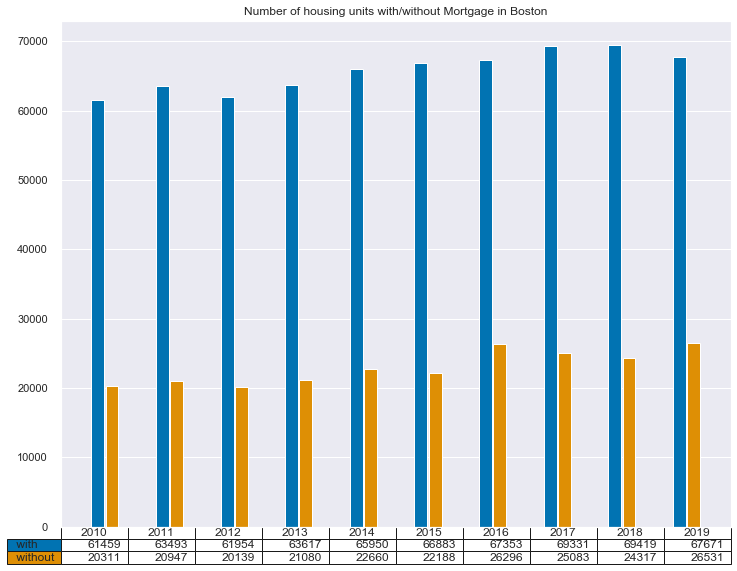

In [8]:
# Bar plot for the total number of units with and without a mortgage in Boston over the 10 years.
data = [with_mortgage, wo_mortgage]

plt.style.use(['seaborn-paper', 'seaborn-whitegrid'])
plt.style.use(['seaborn'])
sns.set(palette='colorblind')

labels = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

bar_width = 0.20
data = [with_mortgage, wo_mortgage]

colors = sns.color_palette(palette='colorblind')
columns = ('2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019')

index = np.arange(len(labels))
fig = plt.figure(figsize=(12,9))
plt.bar(index, with_mortgage, bar_width)
plt.bar(index+bar_width+.02, wo_mortgage, bar_width)
plt.table(cellText=data,
          rowLabels=[' with ', ' without '],
          rowColours=colors,
          colLabels=columns,
          loc='bottom')


fig.subplots_adjust(bottom=0.1)
plt.xticks([])
plt.title('Number of housing units with/without Mortgage in Boston')
#plt.show()
plt.savefig("num of mortgage.png", dpi=200, bbox_inches = "tight")


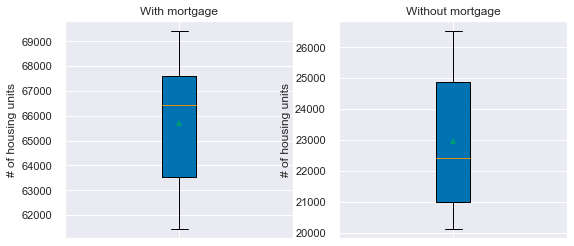

In [9]:
#Boxplot for mortgage and without mortgage
labels = ['']
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

bp_with = ax1.boxplot(with_mortgage,
                      showmeans=True,
                      vert=True,  
                      patch_artist=True,  
                      labels=labels)  
ax1.set_title('With mortgage')

bp_wo = ax2.boxplot(wo_mortgage,
                    showmeans=True,
                    vert=True,  
                    patch_artist=True, 
                    labels=labels)  
ax2.set_title('Without mortgage')


for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_ylabel('# of housing units')

#plt.show()
plt.savefig("number_boxplot.png", dpi=200, bbox_inches = "tight")